# Data Structures

```
2 data structures to Python: Series and DataFrame, both of which are build on top of Numpy ( this means it's fast)
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Series

```
A Series is a one dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.
```

In [3]:
s = pd.Series([123, 'python', 3.14, -456, 'PyFML!!!'])
s

0         123
1      python
2        3.14
3        -456
4    PyFML!!!
dtype: object

In [8]:
type(s)

pandas.core.series.Series

In [10]:
s = pd.Series([123, 'python', 3.14, -456, 'PyFML!!!'], index=list('ABCDE'))
s

A         123
B      python
C        3.14
D        -456
E    PyFML!!!
dtype: object

In [11]:
s[0], s['A']

(123, 123)

```
The Series contructor can convert a dic as well, using the keys of the dic as its index
```

In [12]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}

In [14]:
cities = pd.Series(d)
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [17]:
cities[1], cities['Boston']

(nan, nan)

In [20]:
name_city = 'chicago'
cities[name_city.capitalize()]

1000.0

```
Can use index to select specific items from the Series
```

In [21]:
cities['Chicago']

1000.0

In [22]:
cities[['Chicago', 'Portland', 'San Francisco']]

Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

```
Or can use a Boolean Indexing for selection
```

In [23]:
cities

Austin            450.0
Boston              NaN
Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [24]:
cities[cities < 1050]

Austin       450.0
Chicago     1000.0
Portland     900.0
dtype: float64

In [25]:
less_than_1050 = cities < 1050
less_than_1050

Austin            True
Boston           False
Chicago           True
New York         False
Portland          True
San Francisco    False
dtype: bool

In [26]:
cities[less_than_1050]

Austin       450.0
Chicago     1000.0
Portland     900.0
dtype: float64

In [27]:
cities[cities < 1050] == cities[less_than_1050]

Austin      True
Chicago     True
Portland    True
dtype: bool

```
Can also change the values in a Series on the fly
```

In [28]:
cities['Chicago']

1000.0

In [29]:
cities['Chicago'] = 3000

In [30]:
cities['Chicago']

3000.0

In [31]:
# or changing values using Boolean logic

In [32]:
cities[cities < 1050]

Austin      450.0
Portland    900.0
dtype: float64

In [33]:
cities[cities < 1050] = 750

In [34]:
cities[cities < 1050]

Austin      750.0
Portland    750.0
dtype: float64

```
Check item is in the Series ???
```

In [35]:
'Chicago' in cities, 750.0 in cities

(True, False)

```
Mathematical operations can be done using scalars and functions.
```

In [36]:
cities

Austin            750.0
Boston              NaN
Chicago          3000.0
New York         1300.0
Portland          750.0
San Francisco    1100.0
dtype: float64

In [37]:
cities / 3

Austin            250.000000
Boston                   NaN
Chicago          1000.000000
New York          433.333333
Portland          250.000000
San Francisco     366.666667
dtype: float64

In [38]:
np.square(cities)

Austin            562500.0
Boston                 NaN
Chicago          9000000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
dtype: float64

In [39]:
np.square?

```
You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values. Values on either Series that did not have a shared index will produce a NULL/NaN (not a number).
```

In [41]:
cities[['Chicago', 'New York', 'Portland']]

Chicago     3000.0
New York    1300.0
Portland     750.0
dtype: float64

In [42]:
cities[['Austin', 'New York']]

Austin       750.0
New York    1300.0
dtype: float64

In [43]:
cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']]

Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64

```
NULL checking: isnull | notnull
```

In [44]:
cities.notnull?

In [47]:
cities.notnull()

Austin            True
Boston           False
Chicago           True
New York          True
Portland          True
San Francisco     True
dtype: bool

In [48]:
cities.isnull?

In [49]:
cities.isnull()

Austin           False
Boston            True
Chicago          False
New York         False
Portland         False
San Francisco    False
dtype: bool

In [50]:
cities[cities.isnull()]

Boston   NaN
dtype: float64

# DataFrame

```
A DataFrame is a tablular data structure comprised of rows and columns, similar to a spreadsheet database table, or R's data.frame object. Can think DataFrame as a group of Series objects that share an index ( the column names )
```

### Reading Data

In [53]:
# By default, the DataFrame constructor will order the columns alphabetically
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
data

{'losses': [5, 8, 6, 1, 5, 10, 6, 12],
 'team': ['Bears',
  'Bears',
  'Bears',
  'Packers',
  'Packers',
  'Lions',
  'Lions',
  'Lions'],
 'wins': [11, 8, 10, 15, 11, 6, 10, 4],
 'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012]}

In [58]:
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


In [59]:
football.columns

Index(['year', 'team', 'wins', 'losses'], dtype='object')

In [60]:
football.values

array([[2010, 'Bears', 11, 5],
       [2011, 'Bears', 8, 8],
       [2012, 'Bears', 10, 6],
       [2011, 'Packers', 15, 1],
       [2012, 'Packers', 11, 5],
       [2010, 'Lions', 6, 10],
       [2011, 'Lions', 10, 6],
       [2012, 'Lions', 4, 12]], dtype=object)

In [63]:
football.index

RangeIndex(start=0, stop=8, step=1)

In [64]:
!head mariano-rivera.csv

Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB,Awards
1995,25,NYY,AL,5,3,.625,5.51,19,10,2,0,0,0,67.0,71,43,41,11,30,0,51,2,1,0,301,84,1.507,9.5,1.5,4.0,6.9,1.70,
1996,26,NYY,AL,8,3,.727,2.09,61,0,14,0,0,5,107.2,73,25,25,1,34,3,130,2,0,1,425,240,0.994,6.1,0.1,2.8,10.9,3.82,CYA-3MVP-12
1997,27,NYY,AL,6,4,.600,1.88,66,0,56,0,0,43,71.2,65,17,15,5,20,6,68,0,0,2,301,239,1.186,8.2,0.6,2.5,8.5,3.40,ASMVP-25
1998,28,NYY,AL,3,0,1.000,1.91,54,0,49,0,0,36,61.1,48,13,13,3,17,1,36,1,0,0,246,233,1.060,7.0,0.4,2.5,5.3,2.12,
1999,29,NYY,AL,4,3,.571,1.83,66,0,63,0,0,45,69.0,43,15,14,2,18,3,52,3,1,2,268,257,0.884,5.6,0.3,2.3,6.8,2.89,ASCYA-3MVP-14
2000,30,NYY,AL,7,4,.636,2.85,66,0,61,0,0,36,75.2,58,26,24,4,25,3,58,0,0,2,311,170,1.097,6.9,0.5,3.0,6.9,2.32,AS
2001,31,NYY,AL,4,6,.400,2.34,71,0,66,0,0,50,80.2,61,24,21,5,12,2,83,1,0,1,310,192,0.905,6.8,0.6,1.3,9.3,6.92,ASMVP-11
2002,32,NYY,AL,1,4,.200,2.74,45,0,37,0,0,28,46.0,35,16,14,3,11

In [65]:
from_csv = pd.read_csv('mariano-rivera.csv')
from_csv.head()

,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB,Awards
0,1995,25,NYY,AL,5,3,0.625,5.51,19,10,...,0,301,84,1.507,9.5,1.5,4.0,6.9,1.70,NaN
1,1996,26,NYY,AL,8,3,0.727,2.09,61,0,...,1,425,240,0.994,6.1,0.1,2.8,10.9,3.82,CYA-3MVP-12
2,1997,27,NYY,AL,6,4,0.600,1.88,66,0,...,2,301,239,1.186,8.2,0.6,2.5,8.5,3.40,ASMVP-25
3,1998,28,NYY,AL,3,0,1.000,1.91,54,0,...,0,246,233,1.060,7.0,0.4,2.5,5.3,2.12,NaN
4,1999,29,NYY,AL,4,3,0.571,1.83,66,0,...,2,268,257,0.884,5.6,0.3,2.3,6.8,2.89,ASCYA-3MVP-14


In [67]:
data_csv = pd.read_csv('mariano-rivera.csv', header=None)
data_csv.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,...,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB,Awards
1,1995,25,NYY,AL,5,3,.625,5.51,19,10,...,0,301,84,1.507,9.5,1.5,4.0,6.9,1.70,NaN
2,1996,26,NYY,AL,8,3,.727,2.09,61,0,...,1,425,240,0.994,6.1,0.1,2.8,10.9,3.82,CYA-3MVP-12
3,1997,27,NYY,AL,6,4,.600,1.88,66,0,...,2,301,239,1.186,8.2,0.6,2.5,8.5,3.40,ASMVP-25
4,1998,28,NYY,AL,3,0,1.000,1.91,54,0,...,0,246,233,1.060,7.0,0.4,2.5,5.3,2.12,NaN


In [68]:
cols = ['num', 'game', 'date', 'team', 'home_away', 'opponent',
        'result', 'quarter', 'distance', 'receiver', 'score_before',
        'score_after']

In [73]:
no_headers = pd.read_csv('peyton-passing-TDs-2012.csv', sep=',', header=None, names=cols)
no_headers

,num,game,date,team,home_away,opponent,result,quarter,distance,receiver,score_before,score_after
0,1,1,2012-09-09,DEN,NaN,PIT,W 31-19,3,71,Demaryius Thomas,Trail 7-13,Lead 14-13*
1,2,1,2012-09-09,DEN,NaN,PIT,W 31-19,4,1,Jacob Tamme,Trail 14-19,Lead 22-19*
2,3,2,2012-09-17,DEN,@,ATL,L 21-27,2,17,Demaryius Thomas,Trail 0-20,Trail 7-20
3,4,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,38,Brandon Stokley,Trail 11-31,Trail 18-31
4,5,3,2012-09-23,DEN,NaN,HOU,L 25-31,4,6,Joel Dreessen,Trail 18-31,Trail 25-31
5,6,4,2012-09-30,DEN,NaN,OAK,W 37-6,1,22,Joel Dreessen,Tied 0-0,Lead 7-0*
6,7,4,2012-09-30,DEN,NaN,OAK,W 37-6,3,17,Eric Decker,Lead 10-6,Lead 17-6
7,8,4,2012-09-30,DEN,NaN,OAK,W 37-6,3,14,Lance Ball,Lead 24-6,Lead 31-6
8,9,5,2012-10-07,DEN,@,NWE,L 21-31,2,1,Joel Dreessen,Trail 0-7,Tied 7-7
9,10,5,2012-10-07,DEN,@,NWE,L 21-31,3,2,Eric Decker,Trail 7-31,Trail 14-31


```python
my_dataframe.to_csv('path_to_file.csv')
```

Read from EXCEL file

```python
football = pd.read_excel('football.xlsx', 'Sheet1')
football
```

##### Clipboard

```
See the result before read it into pandas
```

In [75]:
link = pd.read_clipboard()
link

,http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/


##### URL

```
 can also read directly from a URL.
```

In [76]:
url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'

In [78]:
from_url = pd.read_table(url)
from_url.head()

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,$10,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,$9,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,$9.50.,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925
3,4,Roast Beef,Al&rsquo;s Deli,"The Francophile brothers behind this deli, whi...",$9.40.,914 Noyes St.,Evanston,NaN,alsdeli.net,"914 Noyes St., Evanston","914 Noyes Street, Evanston, IL 60201, USA",42.058442,-87.684425
4,5,PB&amp;L,Publican Qualty Meats,"When this place opened in February, it quickly...",$10,825 W. Fulton Mkt.,Chicago,312-445-8977,publicanqualitymeats.com,"825 W. Fulton Mkt., Chicago","825 West Fulton Market, Chicago, IL 60607, USA",41.886637,-87.648553


##### Google Analytics

http://blog.yhat.com/posts/pandas-google-analytics.html

https://quantabee.wordpress.com/2012/12/17/google-analytics-pandas/

### Working with DataFrames

In [80]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [83]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')
ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [84]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


### Inspection

In [87]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 5 columns):
movie_id              1682 non-null int64
title                 1682 non-null object
release_date          1681 non-null object
video_release_date    0 non-null float64
imdb_url              1679 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 65.8+ KB


In [95]:
# An approximate amount of RAM used to hold the DataFrame
movies.memory_usage()

Index                    80
movie_id              13456
title                 13456
release_date          13456
video_release_date    13456
imdb_url              13456
dtype: int64

In [96]:
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

In [97]:
movies.columns, movies.index, movies.values

(Index(['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'], dtype='object'),
 RangeIndex(start=0, stop=1682, step=1),
 array([[1, 'Toy Story (1995)', '01-Jan-1995', nan,
         'http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)'],
        [2, 'GoldenEye (1995)', '01-Jan-1995', nan,
         'http://us.imdb.com/M/title-exact?GoldenEye%20(1995)'],
        [3, 'Four Rooms (1995)', '01-Jan-1995', nan,
         'http://us.imdb.com/M/title-exact?Four%20Rooms%20(1995)'],
        ..., 
        [1680, 'Sliding Doors (1998)', '01-Jan-1998', nan,
         'http://us.imdb.com/Title?Sliding+Doors+(1998)'],
        [1681, 'You So Crazy (1994)', '01-Jan-1994', nan,
         'http://us.imdb.com/M/title-exact?You%20So%20Crazy%20(1994)'],
        [1682, 'Scream of Stone (Schrei aus Stein) (1991)', '08-Mar-1996',
         nan,
         'http://us.imdb.com/M/title-exact?Schrei%20aus%20Stein%20(1991)']], dtype=object))

In [101]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [102]:
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


```
We can quickly see the average age of our users is just above 34 years old, with the youngest being 7 and the oldest being 73. The median age is 31, with the youngest quartile of users being 25 or younger, and the oldest quartile being at least 43.
```

In [105]:
movies[5:10]

,movie_id,title,release_date,video_release_date,imdb_url
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995)
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...


In [106]:
movies[5:10:2]

,movie_id,title,release_date,video_release_date,imdb_url
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995)
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...


### Selecting

```
You can think of a DataFrame as a group of Series that share an index (in this case the column headers). This makes it easy to select specific columns.

Selecting a single column from the DataFrame will return a Series object.
```

In [112]:
users['occupation'].head()

0    technician
1         other
2        writer
3    technician
4         other
Name: occupation, dtype: object

In [113]:
users[['age', 'zip_code']].head()

,age,zip_code
0,24,85711
1,53,94043
2,23,32067
3,24,43537
4,33,15213


In [114]:
columns_you_want = ['occupation', 'sex'] 
users[columns_you_want].head()

,occupation,sex
0,technician,M
1,other,F
2,writer,M
3,technician,M
4,other,F


In [116]:
users.age.head()

0    24
1    53
2    23
3    24
4    33
Name: age, dtype: int64

In [117]:
users[users.age > 25].head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


In [118]:
users[(users.age == 40) & (users.sex == 'M')].head()

,user_id,age,sex,occupation,zip_code
18,19,40,M,librarian,02138
82,83,40,M,other,44133
115,116,40,M,healthcare,97232
199,200,40,M,programmer,93402
283,284,40,M,executive,92629


In [119]:
users[(users.sex == 'F') & (users.age < 30)].head()

,user_id,age,sex,occupation,zip_code
11,12,28,F,other,06405
23,24,21,F,artist,94533
31,32,28,F,student,78741
34,35,20,F,homemaker,42459
35,36,19,F,student,93117


```
By default, set_index returns a new DataFrame, so you'll have to specify if you'd like the changes to occur in place.
```

In [121]:
users.set_index('user_id').head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [122]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [123]:
with_new_index = users.set_index('user_id')
with_new_index.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


```
If you want to modify your existing DataFrame, use the inplace parameter. Most DataFrame methods return new a DataFrames, while offering an inplace parameter. 
```

In [124]:
users.set_index('user_id', inplace=True)
users.head()

,age,sex,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


```
select rows by position using the iloc method.
```

In [125]:
users.iloc[99]

age                  36
sex                   M
occupation    executive
zip_code          90254
Name: 100, dtype: object

In [127]:
users.iloc[[1, 50, 300]]

,age,sex,occupation,zip_code
user_id,,,,
2,53,F,other,94043
51,28,M,educator,16509
301,24,M,student,55439


```
Can select rows by label with the loc method.
```

In [128]:
users.loc[100]

age                  36
sex                   M
occupation    executive
zip_code          90254
Name: 100, dtype: object

In [129]:
users.loc[[2, 51, 301]]

,age,sex,occupation,zip_code
user_id,,,,
2,53,F,other,94043
51,28,M,educator,16509
301,24,M,student,55439


In [130]:
users.reset_index(inplace=True)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


```
The simplified rules of indexing are

- Use loc for label-based indexing
- Use iloc for positional indexing
```

### Joining

In [131]:
movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [132]:
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


```
Like SQL's JOIN clause, pandas.merge allows two DataFrames to be joined on one or more keys. The function provides a series of parameters (on, left_on, right_on, left_index, right_index) allowing you to specify the columns or indexes on which to join.
```

```
By default, pandas.merge operates as an inner join, which can be changed using the how parameter.
```

In [134]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
left_frame

,key,left_value
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [135]:
right_frame

,key,right_value
0,2,f
1,3,g
2,4,h
3,5,i
4,6,j


##### inner join (default)

In [136]:
pd.merge(left_frame, right_frame, on='key', how='inner')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


In [137]:
pd.merge?

In [139]:
pd.merge(left_frame, right_frame, left_on='key', right_on='key')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h


In [143]:
pd.merge(left_frame, right_frame, left_on='key', right_index=True)

,key,key_x,left_value,key_y,right_value
0,0,0,a,2,f
1,1,1,b,3,g
2,2,2,c,4,h
3,3,3,d,5,i
4,4,4,e,6,j


In [149]:
pd.merge(left_frame, right_frame, right_on='key', left_index=True)

,key,key_x,left_value,key_y,right_value
0,2,2,c,2,f
1,3,3,d,3,g
2,4,4,e,4,h


##### left outer join

In [152]:
left_frame

,key,left_value
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [153]:
right_frame

,key,right_value
0,2,f
1,3,g
2,4,h
3,5,i
4,6,j


In [150]:
pd.merge(left_frame, right_frame, on='key', how='left')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


##### right outer join

In [154]:
pd.merge(left_frame, right_frame, on='key', how='right')

,key,left_value,right_value
0,2,c,f
1,3,d,g
2,4,e,h
3,5,NaN,i
4,6,NaN,j


##### full outer join

In [155]:
pd.merge(left_frame, right_frame, on='key', how='outer')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h
5,5,NaN,i
6,6,NaN,j


### Combining

```
pandas also provides a way to combine DataFrames along an axis - pandas.concat. While the function is equivalent to SQL's UNION clause, there's a lot more that can be done with it.

pandas.concat takes a list of Series or DataFrames and returns a Series or DataFrame of the concatenated objects. Note that because the function takes list, you can combine many objects at once.
```

In [156]:
left_frame

,key,left_value
0,0,a
1,1,b
2,2,c
3,3,d
4,4,e


In [157]:
right_frame

,key,right_value
0,2,f
1,3,g
2,4,h
3,5,i
4,6,j


In [158]:
pd.concat([left_frame, right_frame])

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


In [160]:
pd.concat([left_frame, right_frame], axis=1)

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


### Grouping --- split-apply-combine strategy

In [178]:
![images](http://i.imgur.com/yjNkiwL.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


In [162]:
headers = ['name', 'title', 'department', 'salary']
chicago = pd.read_csv('city-of-chicago-salaries.csv', 
                      header=0,
                      names=headers,
                      converters={'salary': lambda x: float(x.replace('$', ''))})
chicago.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440.0


raw data

```
"ZEPEDA,  ERNESTO",TREE TRIMMER,STREETS & SAN,$71572.80
"ZEPEDA,  JOSE R",CONSTRUCTION LABORER,WATER MGMNT,$76960.00
"ZEPEDA,  LILIANA",POLICE OFFICER,POLICE,$43104.00
"ZEPEDA,  LISA M",POLICE OFFICER,POLICE,$80724.00
"ZEPEDA,  LUIS",WARD SUPERINTENDENT,STREETS & SAN,$83940.00
"ZEPEDA,  SERGIO",ELECTRICAL MECHANIC,AVIATION,$89440.00
"ZERITIS,  ANGELO G",FIREFIGHTER-EMT,FIRE,$81906.00
```

In [171]:
by_dept = chicago.groupby('department')
by_dept

In [183]:
by_dept.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512.0
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372.0
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916.0
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648.0
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440.0
5,"ABBATEMARCO, JAMES J",FIREFIGHTER,FIRE,78012.0
6,"ABBATE, TERRY M",POLICE OFFICER,POLICE,80724.0
7,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,2756.0
8,"ABBOTT, LYNISE M",CLERK III,POLICE,41784.0
9,"ABBRUZZESE, WILLIAM J",INVESTIGATOR - IPRA II,IPRA,62832.0


```
Calling count returns the total number of NOT NULL values within each column. If we were interested in the total number of records in each group, we could use size.
```

In [184]:
by_dept.count().head()

,name,title,salary
department,,,
ADMIN HEARNG,42,42,42
ANIMAL CONTRL,61,61,61
AVIATION,1218,1218,1218
BOARD OF ELECTION,110,110,110
BOARD OF ETHICS,9,9,9


In [186]:
by_dept.size().tail()

department
PUBLIC LIBRARY     926
STREETS & SAN     2070
TRANSPORTN        1168
TREASURER           25
WATER MGMNT       1857
dtype: int64

In [187]:
by_dept.sum()[20:25]

,salary
department,
HUMAN RESOURCES,4850928.0
INSPECTOR GEN,4035150.0
IPRA,7006128.0
LAW,31883920.2
LICENSE APPL COMM,65436.0


In [188]:
by_dept.mean()[20:25]

,salary
department,
HUMAN RESOURCES,71337.176471
INSPECTOR GEN,80703.000000
IPRA,82425.035294
LAW,70853.156000
LICENSE APPL COMM,65436.000000


In [189]:
by_dept.median()[20:25]

,salary
department,
HUMAN RESOURCES,68496.0
INSPECTOR GEN,76116.0
IPRA,82524.0
LAW,66492.0
LICENSE APPL COMM,65436.0


In [193]:
# Returns number of unique elements in the group 
by_dept.title.nunique?

In [194]:
by_dept.title.nunique().sort_values(ascending=False)[:5]

department
WATER MGMNT    153
TRANSPORTN     150
POLICE         130
AVIATION       125
HEALTH         118
Name: title, dtype: int64

In [201]:
chicago.values[0][-1]

85512.0

In [202]:
type(chicago.values[0][-1])

float

### split-apply-combine

In [203]:
def ranker(df):
    """Assigns a rank to each employee based on salary, with 1 being the highest paid.
    Assumes the data is DESC sorted."""
    df['dept_rank'] = np.arange(len(df)) + 1
    return df

In [205]:
chicago.sort_values('salary', ascending=False, inplace=True)
chicago = chicago.groupby('department').apply(ranker)
print(chicago[chicago.dept_rank == 1].head(7))

                         name                     title      department  \
18039     MC CARTHY,  GARRY F  SUPERINTENDENT OF POLICE          POLICE   
8004           EMANUEL,  RAHM                     MAYOR  MAYOR'S OFFICE   
25588       SANTIAGO,  JOSE A         FIRE COMMISSIONER            FIRE   
763    ANDOLINO,  ROSEMARIE S  COMMISSIONER OF AVIATION        AVIATION   
4697     CHOUCAIR,  BECHARA N    COMMISSIONER OF HEALTH          HEALTH   
21971      PATTON,  STEPHEN R       CORPORATION COUNSEL             LAW   
12635      HOLT,  ALEXANDRA D                BUDGET DIR   BUDGET & MGMT   

         salary  dept_rank  
18039  260004.0          1  
8004   216210.0          1  
25588  202728.0          1  
763    186576.0          1  
4697   177156.0          1  
21971  173664.0          1  
12635  169992.0          1  


In [206]:
chicago[chicago.department == "LAW"][:5]

,name,title,department,salary,dept_rank
21971,"PATTON, STEPHEN R",CORPORATION COUNSEL,LAW,173664.0,1
6311,"DARLING, LESLIE M",FIRST ASST CORPORATION COUNSEL,LAW,149160.0,2
17680,"MARTINICO, JOSEPH P",CHIEF LABOR NEGOTIATOR,LAW,144036.0,3
22357,"PETERS, LYNDA A",CITY PROSECUTOR,LAW,139932.0,4
31383,"WONG JR, EDWARD J",DEPUTY CORPORATION COUNSEL,LAW,137076.0,5


# Using pandas on the MovieLens dataset

In [207]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,
                    encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

In [209]:
users.head(3)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


In [210]:
ratings.head(3)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [211]:
movies.head(3)

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...


In [213]:
# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head(3)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,287,5,875334088
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,148,4,877019411


In [215]:
lens = pd.merge(movie_ratings, users)
lens.head(3)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076


### What are the 25 most rated movies?

In [216]:
most_rated_25 = lens.groupby('title').size().sort_values(ascending=False)[:25]
len(most_rated_25)

25

In [218]:
most_rated_25

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

In [219]:
# similer to: 
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

### Which movies are most highly rated?

In [220]:
movie_stats = lens.groupby('title').agg?

Object `agg` not found.


In [223]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

```
We can use the agg method to pass a dictionary specifying the columns to aggregate (as keys) and a list of functions we'd like to apply.
```

In [224]:
# sort by rating average
movie_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

```
Because movie_stats is a DataFrame, we use the sort method - only Series objects use order. Additionally, because our columns are now a MultiIndex, we need to pass in a tuple specifying how to sort.
```

http://pandas.pydata.org/pandas-docs/stable/indexing.html#hierarchical-indexing-multiindex


In [227]:
atleast_100 = movie_stats['rating']['size'] >= 100
atleast_100.head()

title
'Til There Was You (1997)    False
1-900 (1994)                 False
101 Dalmatians (1996)         True
12 Angry Men (1957)           True
187 (1997)                   False
Name: size, dtype: bool

In [228]:
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating          
                                         size      mean
title                                                  
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

In [230]:
# movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
# atleast_100 = movie_stats['rating'].size >= 100
# movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

### Limiting our population going forward

In [232]:
# 50 most rated movies
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]
most_50.head()

movie_id
50     583
258    509
100    508
181    507
294    485
dtype: int64

### Which movies are most controversial amongst different ages?

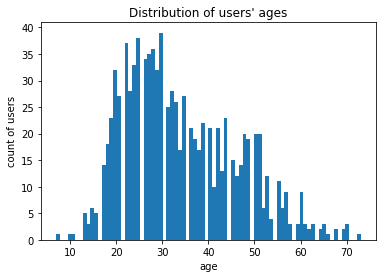

In [237]:
# bins: integer, default 10
# Number of histogram bins to be used
users.age.plot.hist(bins=80)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

### Binning our users

In [240]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


```
pandas.cut allows you to bin numeric data. In the above lines, we first created labels to name our bins, then split our users into eight bins of ten years (0-9, 10-19, 20-29, etc.). Our use of right=False told the function that we wanted the bins to be exclusive of the max age in the bin (e.g. a 30 year old user gets the 30s label).
```

In [242]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

```
Young users seem a bit more critical than other age groups. Let's look at how the 50 most rated movies are viewed across each age group. We can use the most_50 Series we created earlier for filtering.
```

In [246]:
# lens.set_index('movie_id', inplace=True)
lens.head()

,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
movie_id,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


In [248]:
by_age = lens.loc[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

```
Wouldn't it be nice to see the data as a table? Each title as a row, each age group as a column, and the average rating in each cell.

Behold! The magic of unstack!
```

In [249]:
by_age.rating.mean().unstack().fillna(0)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),0.0,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,0.000000
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),0.0,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,0.000000
"Fugitive, The (1993)",0.0,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,0.000000
"Full Monty, The (1997)",0.0,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",0.0,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,0.000000
Groundhog Day (1993),0.0,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


In [250]:
by_age.rating.mean().unstack(0).fillna(0)

title,Air Force One (1997),Alien (1979),Aliens (1986),Apollo 13 (1995),Back to the Future (1985),"Birdcage, The (1996)",Braveheart (1995),Conspiracy Theory (1997),Contact (1997),Dead Man Walking (1995),...,Star Trek: First Contact (1996),Star Wars (1977),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),Twelve Monkeys (1995),Twister (1996),When Harry Met Sally... (1989),Willy Wonka and the Chocolate Factory (1971)
age_group,,,,,,,,,,,,,,,,,,,,,
0-9,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,...,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.000000,0.000000
10-19,3.647059,4.111111,4.050000,3.954545,4.037037,3.217391,4.384615,3.565217,3.693878,3.647059,...,3.576923,4.630435,4.173913,3.619048,4.611111,3.621622,3.916667,3.000000,3.500000,3.387097
20-29,3.666667,4.026087,4.087719,3.845455,3.720588,3.413223,4.194915,3.382114,3.785714,3.926606,...,3.641975,4.413043,3.969466,3.875969,4.336066,3.920635,3.847458,3.200000,4.000000,3.820144
30-39,3.570000,4.103448,3.887640,4.064935,3.915789,3.514286,4.156627,3.419355,3.847458,3.814286,...,3.737864,4.305732,3.977011,4.105882,4.236111,4.033058,3.788462,3.133333,3.882353,3.908046
40-49,3.555556,3.833333,3.526316,3.822222,4.036364,3.500000,4.051282,3.465116,3.866667,3.754386,...,3.760000,4.166667,4.212121,3.975610,3.984848,3.700000,3.653846,3.479167,3.825000,3.058824
50-59,3.750000,4.272727,4.235294,4.187500,3.500000,3.346154,3.956522,3.538462,3.739130,4.294118,...,3.272727,4.469388,3.941176,3.900000,4.210526,3.758621,3.650000,3.300000,3.904762,2.857143
60-69,3.666667,3.500000,3.800000,3.750000,3.857143,3.888889,3.714286,2.600000,3.777778,4.000000,...,3.000000,4.000000,3.500000,3.600000,3.846154,3.400000,3.000000,3.250000,3.800000,3.000000
70-79,3.666667,4.000000,3.000000,4.000000,4.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,5.000000,4.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.000000,4.500000,0.000000


### Which movies do men and women most disagree on?

In [271]:
lens.reset_index('movie_id', inplace=True)
# lens.set_index('movie_id', inplace=True)
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076,60-69
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076,60-69
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076,60-69
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076,60-69


In [272]:
lens.pivot_table?

In [283]:
# Create a spreadsheet-style pivot table as a DataFrame. The levels in the
# pivot table will be stored in MultiIndex objects (hierarchical indexes) on
# the index and columns of the result DataFrame
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [284]:
pivoted['diff'] = pivoted.M - pivoted.F

In [285]:
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [286]:
pivoted.reset_index('movie_id', inplace=True)
pivoted.head()

sex,movie_id,F,M,diff
title,,,,
Toy Story (1995),1,3.789916,3.909910,0.119994
GoldenEye (1995),2,3.368421,3.178571,-0.189850
Four Rooms (1995),3,2.687500,3.108108,0.420608
Get Shorty (1995),4,3.400000,3.591463,0.191463
Copycat (1995),5,3.772727,3.140625,-0.632102


In [278]:
# is in ...
pivoted.movie_id.isin?

In [287]:
most_50.index

Int64Index([ 50, 258, 100, 181, 294, 286, 288,   1, 300, 121, 174, 127,  56,
              7,  98, 237, 117, 172, 222, 313, 204, 405,  79, 210, 151, 173,
             69, 168, 748, 269, 257, 195, 423,   9, 318, 276, 302,  22,  96,
            328,  25,  15, 118, 183, 216, 176,  64, 234, 202,  28],
           dtype='int64', name='movie_id')

In [288]:
pivoted[pivoted.movie_id.isin(most_50.index)].head()

sex,movie_id,F,M,diff
title,,,,
Toy Story (1995),1,3.789916,3.909910,0.119994
Twelve Monkeys (1995),7,3.560976,3.861290,0.300315
Dead Man Walking (1995),9,3.927711,3.884259,-0.043452
Mr. Holland's Opus (1995),15,3.945652,3.701493,-0.244160
Braveheart (1995),22,4.126984,4.158120,0.031136


In [289]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.head()

title
Toy Story (1995)             0.119994
Twelve Monkeys (1995)        0.300315
Dead Man Walking (1995)     -0.043452
Mr. Holland's Opus (1995)   -0.244160
Braveheart (1995)            0.031136
Name: diff, dtype: float64

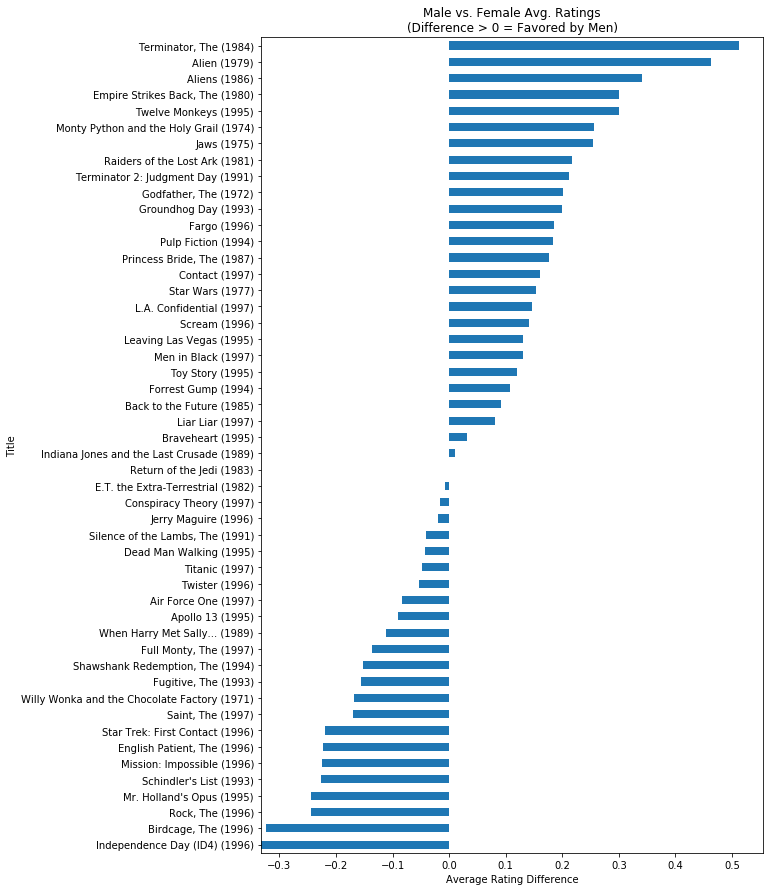

In [290]:
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');